# `lab10`—Conway's Game of Life

**Objectives**

-   Compose a basic array-based cellular automaton.

### Cellular Automata

In this lab, you will build a simulation known as [*Conway's Game of Life*](http://www.math.com/students/wonders/life/life.html).  This is a _cellular automaton_, or a simulation based on cells which behave according to certain fixed rules.

Basic cellular automata are simulations or "games" played on a grid.  We denote cells as being _alive_ if they have a value of `1` and as being _dead_ if they have a value of `0`.  (No other values are permitted.)

Each "time step" we update the grid based on its current state and the list of rules, which is typically quite short.

A complex evolution over time could look like this:

![](https://upload.wikimedia.org/wikipedia/commons/e/e5/Gospers_glider_gun.gif)

Other structures include simple repeating or static patterns, such as:

| Pattern | Pattern | Pattern | Pattern |
| ------- | ------- | ------- | ------- |
| ![](https://upload.wikimedia.org/wikipedia/commons/1/1c/Game_of_life_beacon.gif) | ![](https://upload.wikimedia.org/wikipedia/commons/f/f2/Game_of_life_animated_glider.gif) | ![](https://upload.wikimedia.org/wikipedia/commons/9/95/Game_of_life_blinker.gif) | ![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Game_of_life_beehive.svg/196px-Game_of_life_beehive.svg.png) |

Each cellular automata game has its own set of rules.  PatternOne of the earliest CA games, and the most famous, is [John Conway](https://en.wikipedia.org/wiki/John_Horton_Conway)'s [Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life).

The standard rules for the Game of Life are applied to an array of cells at each "generation":

1.  Any live cell with fewer than two live neighbours dies, as if subject to under-population.
2.  Any live cell with two or three live neighbours lives to the next generation.
3.  Any live cell with more than three live neighbours dies, as if subject to over-population.
4.  Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

When applied, these rules generate a new configuration, the next step in the evolution of the game board.

We will build a Game of Life simulator.  This will require you to track the state of the game board at any point, and be able to apply the rules of evolution stated above.

### Game Grid Setup

Our example starting configuration will be the R-pentomino,

![](./img/hwxc-rpent0.png)

which we will represent in MATLAB with ones and zeroes:

$$
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 \\
0 & 1 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

or

```matlab
[ 0 0 0 0 0 ; 0 0 1 1 0 ; 0 1 1 0 0 ; 0 0 1 0 0 ; 0 0 0 0 0 ]
```

If we were to apply this set of rules to evolve the prior snapshot forward one step at a time, the following sequence would result:

| $t=0$ | $t=1$ | $t=2$ | $t=3$ | $t=4$ | $t=5$ |
| ----- | ----- | ----- | ----- | ----- | ----- |
| ![](./img/hwxc-rpent0.png) | ![](./img/hwxc-rpent1.png) | ![](./img/hwxc-rpent2.png) | ![](./img/hwxc-rpent3.png) | ![](./img/hwxc-rpent4.png) | ![](./img/hwxc-rpent5.png) |

Your first challenge is to evolve an array one step forward by applying the rules to each cell.  As a reminder, the rules are:

1.  Any live cell with fewer than two live neighbours dies, as if subject to under-population.
2.  Any live cell with two or three live neighbours lives to the next generation.
3.  Any live cell with more than three live neighbours dies, as if subject to over-population.
4.  Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

Thus, we need only know the _sum_ of the neighbors to determine which cells live, which die, and which are born.


### <span style="color:#345995">Exercise 1: Evolve a Configuration Forward One Step</span>

-   Compose a function `evolve( array )` which accepts an `array`, and returns the next evolution of that array.

    1.  We only need to know the _sum_ of the neighbors to determine which cells live and which die.  (The diagonals are neighbors as well.)  Find the rules and apply boundary conditions.

        For instance, what happens to boundary cells?  Are they considered as not having neighbors (dead boundary) or as wrapping around (periodic boundary)?  For simplicity in this case, we'll go with the periodic boundary.  (But we still have to handle the edge cases separately.)  To implement the periodic boundary condition, we need to check if an index would be out of bounds; if so, wrap it around.  This is a modulus operation!  Thus for the left neighbor index `lx` this looks like:

            lx = ix-1
            lx = mod(lx,nx)

    2.  We then apply the rules to determine the next generation.

    3.  Return the evolved cellular array `evolved_array`.

In [3]:
% save this as a file evolve.m
function [ evolved_array ] = evolve( array )
  [nx ny] = size(array);  % the shape of the input array
  
  neighbor_array = zeros(nx,ny);  % should be zeros the same size as the input array
  evolved_array = zeros(nx,ny);   % should be zeros the same size as the input array, dtype of np.int64
  
  for ix = 1:nx           % loop over all x-values
    for iy = 1:ny         % loop over all y-values
      lx = ix-1;          % define the left and right neighbor indices
      rx = ix+1;          %
      uy = iy-1;          % define the top and bottom neighbor indices
      dy = iy+1;          %
      % normalize the indices to fall in [1,nx]
      if lx > nx
        lx = lx - nx;
      elseif lx < 1
        lx = lx + nx;
      end
      if rx > nx
        rx = rx - nx;
      elseif rx < 1
        rx = rx + nx;
      end
      if uy > ny
        uy = uy - ny;
      elseif uy < 1
        uy = uy + ny;
      end
      if dy > ny
        dy = dy - ny;
      elseif dy < 1
        dy = dy + ny;
      end %if
      %??? for the rest
      
      % include all EIGHT neighboring cells in an array and sum it up
      neighbors = [array(lx,iy),array(rx,iy),array(ix,uy),array(ix,dy),array(lx,uy),array(lx,dy),array(rx,uy),array(rx,dy)];
      neighbor_array(ix,iy) = sum(neighbors);
      
      % handle the case where the current cell is alive and has two neighbors
      if array(ix,iy) > 0 && neighbor_array(ix,iy) == 2
        evolved_array(ix,iy) = 1;
      % handle the case where the current cell is alive and has three neighbors
      elseif array(ix,iy) > 0 && neighbor_array(ix,iy) == 3
        evolved_array(ix,iy) = 1;
      % handle the case where the current cell is dead and has three neighbors
      elseif array(ix,iy) = 0 && neighbor_array(ix,iy) == 3
        evolved_array(ix,iy) = 1;
      % otherwise the cell is dead
      else
        evolved_array(ix,iy) = 0;
      end %if
    end %for iy
  end %for ix
end %function

Test the simulation using the following initial R-pentomino:

    pentomino = zeros( 8,8 )
    pentomino( 5,5 ) = 1
    pentomino( 4,5 ) = 1
    pentomino( 6,5 ) = 1
    pentomino( 5,4 ) = 1
    pentomino( 4,6 ) = 1

    imshow( pentomino )

At any time, you can visualize the state of the simulation using `imshow`.  (**Do not** do this inside of `evolve`, however; it will be too slow.)

    cells = evolve( pentomino )
    imshow( cells )

pentomino =

   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0

pentomino =

   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0
   0   0   0   0   1   0   0   0
   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0

pentomino =

   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0
   0   0   0   0   1   0   0   0
   0   0   0   0   1   0   0   0
   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0

pentomino =

   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0
   0   0   0   0   1   0   0   0
   0   0   0   0   1 

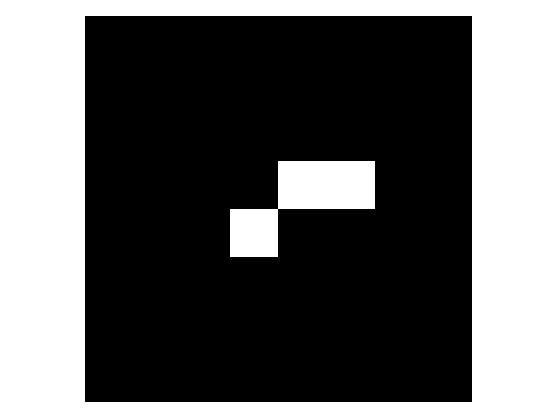

In [4]:
% Run Simulation  of pentomio grid as mentioned above
pentomino = zeros( 8,8 )
pentomino( 5,5 ) = 1
pentomino( 4,5 ) = 1
pentomino( 6,5 ) = 1
pentomino( 5,4 ) = 1
pentomino( 4,6 ) = 1

cells = evolve( pentomino )
imshow( cells )

### Looping Forward in Time

Now that we have a working `evolve` function, we can carry out longer-term simulations of the Game of Life.  (If you haven't gotten `evolve` to work yet, we provide it for this step.)

Consider a wrapper loop that will simulate a glider traveling for `nt` time steps:

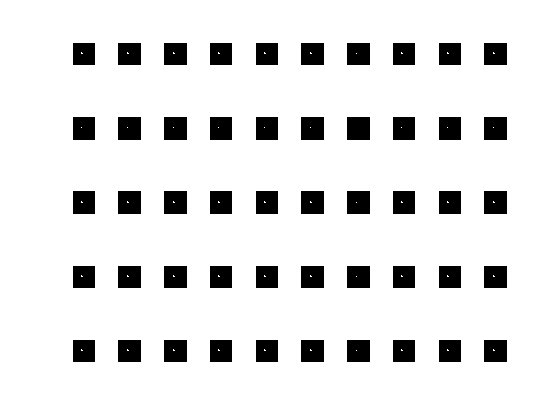

In [23]:
glider = zeros(24,24);
glider(10,10) = 1;
glider(11,10) = 1;
glider(12,10) = 1;
glider(12,11) = 1;
glider(11,12) = 1;

rt = 5;
ct = 10;
nt = rt * ct;
figure; hold on;
cells = glider;
for t = 1:nt
  cells = evolve( cells );
  subplot(rt,ct,t);
  imshow(cells);
end %for

### <span style="color:#345995">Exercise 2:  Evolve Simulation using a Loop</span>

-   Write a program which implements a loop evolving `pentadecathlon` for fifty time steps in five rows of ten images.  Produce a graphic using `imshow` named `figure_1.png`.  (You should maximize the plot before saving it so that you can see fine details.)

        pentadecathlon = zeros(24,24);
        pentadecathlon(10:20,10) = 1;
        pentadecathlon(12, 9) = 1;
        pentadecathlon(12,10) = 0;
        pentadecathlon(12,11) = 1;
        pentadecathlon(17, 9) = 1;
        pentadecathlon(17,10) = 0;
        pentadecathlon(17,11) = 1;

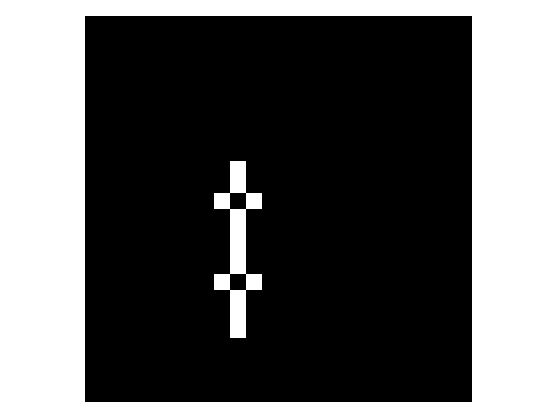

In [45]:
% Test out your code
pentadecathlon = zeros(24,24);
pentadecathlon(10:20,10) = 1;
pentadecathlon(12, 9) = 1;
pentadecathlon(12,10) = 0;
pentadecathlon(12,11) = 1;
pentadecathlon(17, 9) = 1;
pentadecathlon(17,10) = 0;
pentadecathlon(17,11) = 1;
imshow(pentadecathlon)

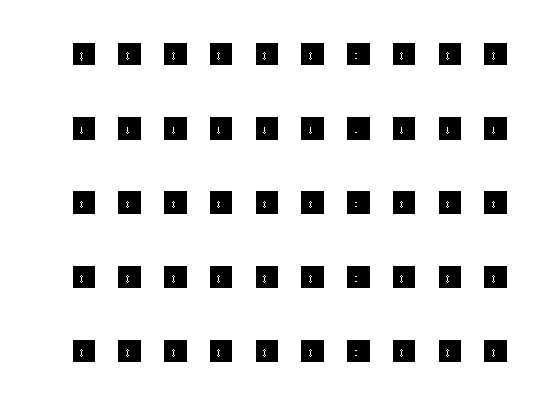

In [46]:
% Write the code on pentadecathlon grid and save the final image as figure_1.png
rt = 5;
ct = 10;
nt = rt * ct;
figure; hold on;
cells = pentadecathlon;
for t = 1:nt
  cells = evolve( cells );
  subplot(rt,ct,t);
  imshow(cells);
end %for
% Save image 


The Simkin glider gun produces an infinite number of gliders.

### <span style="color:#345995">Exercise 3: Evolve a Glider Gun Simuation</span>

-   Write a program which implements a loop evolving `glidergun` for eighty time steps in eight rows of ten images.  Produce a graphic using `imshow` named `figure_2.png`.

        glidergun = zeros(100,100);
        glidergun(2,1)=1;
        glidergun(2,2)=1;
        glidergun(2,8)=1;
        glidergun(2,9)=1;
        glidergun(3,1)=1;
        glidergun(3,2)=1;
        glidergun(3,8)=1;
        glidergun(3,9)=1;
        glidergun(5,5)=1;
        glidergun(5,6)=1;
        glidergun(6,5)=1;
        glidergun(6,6)=1;
        glidergun(11,23)=1;
        glidergun(11,24)=1;
        glidergun(11,26)=1;
        glidergun(11,27)=1;
        glidergun(12,22)=1;
        glidergun(12,28)=1;
        glidergun(13,22)=1;
        glidergun(13,29)=1;
        glidergun(13,32)=1;
        glidergun(13,33)=1;
        glidergun(14,22)=1;
        glidergun(14,23)=1;
        glidergun(14,24)=1;
        glidergun(14,28)=1;
        glidergun(14,32)=1;
        glidergun(14,33)=1;
        glidergun(15,27)=1;
        glidergun(20,25)=1;
        glidergun(20,27)=1;
        glidergun(20,28)=1;
        glidergun(21,25)=1;
        glidergun(21,26)=1;
        glidergun(21,28)=1;

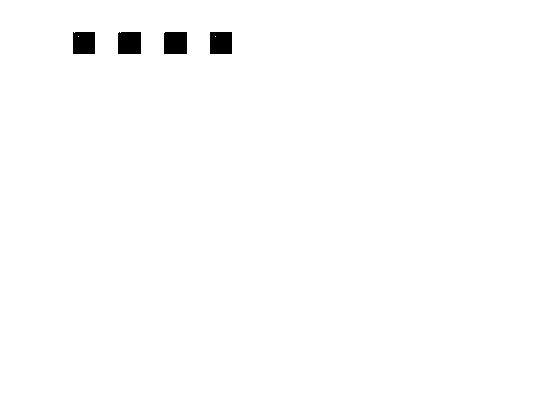

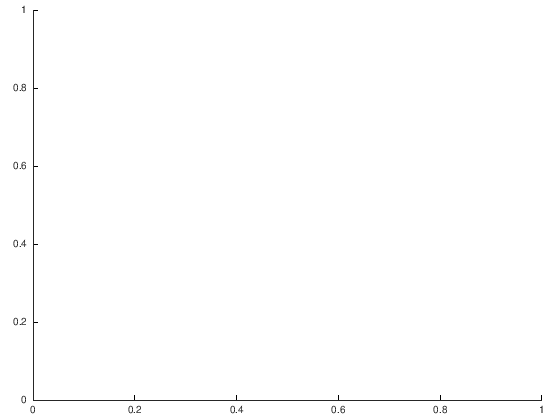

In [42]:
% Test your code
glidergun = zeros(100,100);
glidergun(2,1)=1;
glidergun(2,2)=1;
glidergun(2,8)=1;
glidergun(2,9)=1;
glidergun(3,1)=1;
glidergun(3,2)=1;
glidergun(3,8)=1;
glidergun(3,9)=1;
glidergun(5,5)=1;
glidergun(5,6)=1;
glidergun(6,5)=1;
glidergun(6,6)=1;
glidergun(11,23)=1;
glidergun(11,24)=1;
glidergun(11,26)=1;
glidergun(11,27)=1;
glidergun(12,22)=1;
glidergun(12,28)=1;
glidergun(13,22)=1;
glidergun(13,29)=1;
glidergun(13,32)=1;
glidergun(13,33)=1;
glidergun(14,22)=1;
glidergun(14,23)=1;
glidergun(14,24)=1;
glidergun(14,28)=1;
glidergun(14,32)=1;
glidergun(14,33)=1;
glidergun(15,27)=1;
glidergun(20,25)=1;
glidergun(20,27)=1;
glidergun(20,28)=1;
glidergun(21,25)=1;
glidergun(21,26)=1;
glidergun(21,28)=1;

In [43]:
% Write the code on glidergun grid and save the final image as figure_2.png
rt = 8;
ct = 10;
nt = rt * ct;
figure; hold on;
cells = glidergun;
for t = 1:nt
  cells = evolve( cells );
  subplot(rt,ct,t);
  imshow(cells);
end %for
% Save image

### Lab Submission

### <span style="color:#345995">Manual Check-off</span>

-   To complete this lab, you should save your files to the working directory.  We expect to see the following files, along with your code in this notebook:

    -   `figure_1.png`
    -   `figure_2.png`
    -   `evolve.m (completed)`
    
    Once that is done, you may `Submit` the lab. Make sure to ask a TA/CA to take a look at your figures and check you off manually

Although the foregoing presentation was developed independently, you can find out more about MATLAB and the Game of Life [here](https://www.mathworks.com/content/dam/mathworks/mathworks-dot-com/moler/exm/chapters/life.pdf).

Furthermore, should you wish to modestly alter your foregoing code to produce a 3D matrix with each time step as a slice, you can produce an animated GIF using [this function](https://www.mathworks.com/matlabcentral/fileexchange/43270-save-3d-matrix-as-gif).